In [28]:
import pandas as pd
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from nltk.tokenize import word_tokenize
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer


## Data Preparation

In [32]:
df=pd.read_csv("C:\\Users\\SHANMUGAPRIYAA\\Downloads\\ArticlesApril2017.csv")
df.head(3)

,abstract,articleID,articleWordCount,byline,documentType,headline,keywords,multimedia,newDesk,printPage,pubDate,sectionName,snippet,source,typeOfMaterial,webURL
0,NaN,58def1347c459f24986d7c80,716,By STEPHEN HILTNER and SUSAN LEHMAN,article,Finding an Expansive View of a Forgotten Peop...,"['Photography', 'New York Times', 'Niger', 'Fe...",3,Insider,2,2017-04-01 00:15:41,Unknown,One of the largest photo displays in Times his...,The New York Times,News,https://www.nytimes.com/2017/03/31/insider/nig...
1,NaN,58def3237c459f24986d7c84,823,By GAIL COLLINS,article,"And Now, the Dreaded Trump Curse","['United States Politics and Government', 'Tru...",3,OpEd,23,2017-04-01 00:23:58,Unknown,Meet the gang from under the bus.,The New York Times,Op-Ed,https://www.nytimes.com/2017/03/31/opinion/and...
2,NaN,58def9f57c459f24986d7c90,575,By THE EDITORIAL BOARD,article,Venezuela’s Descent Into Dictatorship,"['Venezuela', 'Politics and Government', 'Madu...",3,Editorial,22,2017-04-01 00:53:06,Unknown,A court ruling annulling the legislature’s aut...,The New York Times,Editorial,https://www.nytimes.com/2017/03/31/opinion/ven...


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886 entries, 0 to 885
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   abstract          22 non-null     object
 1   articleID         886 non-null    object
 2   articleWordCount  886 non-null    int64 
 3   byline            886 non-null    object
 4   documentType      886 non-null    object
 5   headline          886 non-null    object
 6   keywords          886 non-null    object
 7   multimedia        886 non-null    int64 
 8   newDesk           886 non-null    object
 9   printPage         886 non-null    int64 
 10  pubDate           886 non-null    object
 11  sectionName       886 non-null    object
 12  snippet           886 non-null    object
 13  source            886 non-null    object
 14  typeOfMaterial    886 non-null    object
 15  webURL            886 non-null    object
dtypes: int64(3), object(13)
memory usage: 110.9+ KB


In [34]:
df.columns

Index(['abstract', 'articleID', 'articleWordCount', 'byline', 'documentType',
       'headline', 'keywords', 'multimedia', 'newDesk', 'printPage', 'pubDate',
       'sectionName', 'snippet', 'source', 'typeOfMaterial', 'webURL'],
      dtype='object')

In [35]:
df.describe()

,articleWordCount,multimedia,printPage
count,886.000000,886.000000,886.000000
mean,1093.505643,3.857788,7.635440
std,799.095918,7.891072,10.809874
min,57.000000,0.000000,0.000000
25%,708.500000,3.000000,0.000000
50%,982.500000,3.000000,2.000000
75%,1291.750000,3.000000,13.000000
max,7832.000000,68.000000,74.000000


In [36]:
unique_values = df.nunique().reset_index()
unique_values.columns = ['Column', 'Unique Values']
print(tabulate(unique_values, headers='keys', tablefmt='pretty'))

+----+------------------+---------------+
|    |      Column      | Unique Values |
+----+------------------+---------------+
| 0  |     abstract     |      22       |
| 1  |    articleID     |      886      |
| 2  | articleWordCount |      680      |
| 3  |      byline      |      466      |
| 4  |   documentType   |       2       |
| 5  |     headline     |      830      |
| 6  |     keywords     |      778      |
| 7  |    multimedia    |       9       |
| 8  |     newDesk      |      28       |
| 9  |    printPage     |      51       |
| 10 |     pubDate      |      817      |
| 11 |   sectionName    |      31       |
| 12 |     snippet      |      882      |
| 13 |      source      |       2       |
| 14 |  typeOfMaterial  |      11       |
| 15 |      webURL      |      886      |
+----+------------------+---------------+


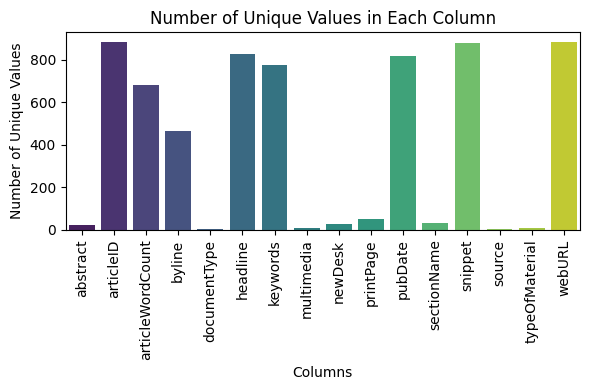

In [37]:
plt.figure(figsize=(6, 4))
ax = sns.barplot(x='Column', y='Unique Values', data=unique_values, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('Number of Unique Values')
plt.title('Number of Unique Values in Each Column')
plt.tight_layout()
plt.show()

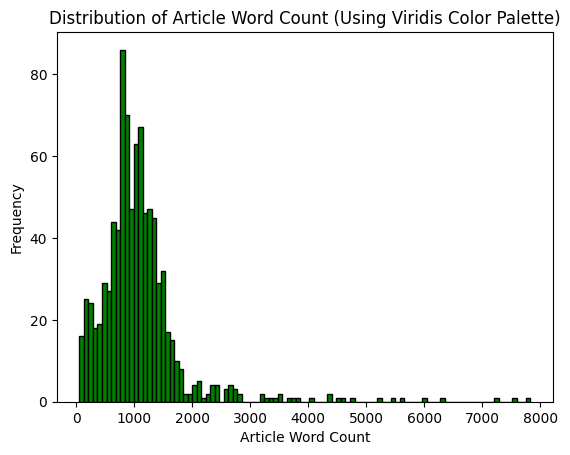

In [38]:
sns.set_palette("viridis")
plt.hist(df['articleWordCount'], bins=100, color='green', edgecolor='black')
plt.xlabel('Article Word Count')
plt.ylabel('Frequency')
plt.title('Distribution of Article Word Count (Using Viridis Color Palette)')
plt.show()

In [39]:
category_counts = df['sectionName'].value_counts()
print(category_counts)

sectionName
Unknown               590
Politics               51
Sunday Review          39
Television             32
Europe                 18
Family                 16
Live                   16
Asia Pacific           13
Baseball               11
Soccer                 11
Middle East             9
Move                    7
Pro Basketball          7
Media                   7
Eat                     6
Mind                    6
Education Life          5
College Basketball      4
Music                   4
DealBook                4
Golf                    4
Lesson Plans            4
Economy                 4
Book Review             4
Tennis                  3
Pro Football            3
Art & Design            3
Hockey                  2
Auto Racing             1
Student Loans           1
Canada                  1
Name: count, dtype: int64


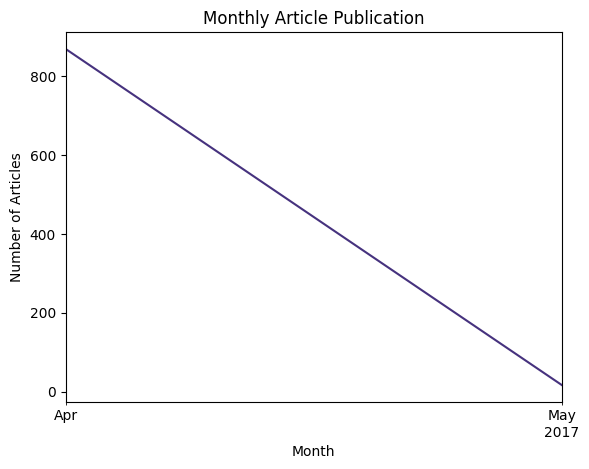

In [40]:
df['pubDate'] = pd.to_datetime(df['pubDate'])
df.set_index('pubDate', inplace=True)
df.resample('M').size().plot()
plt.xlabel('Month')
plt.ylabel('Number of Articles')
plt.title('Monthly Article Publication')
plt.show()

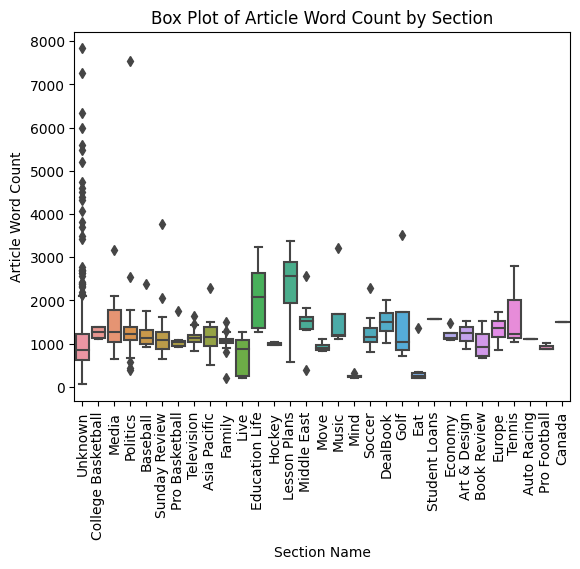

In [41]:
sns.boxplot(x='sectionName', y='articleWordCount', data=df)
plt.xticks(rotation=90)
plt.xlabel('Section Name')
plt.ylabel('Article Word Count')
plt.title('Box Plot of Article Word Count by Section')
plt.show()

## Data Preprocessing

In [42]:
missing_values = df.isna().sum()
df.fillna(0, inplace=True)

In [43]:
df.dropna(inplace=True)

In [44]:
def preprocess_text(text):
    if isinstance(text, str):
        words = word_tokenize(text)
        words = [word.lower() for word in words]        
        words = [word for word in words if word.isalpha()]        
        stop_words = set(stopwords.words('english'))
        words = [word for word in words if word not in stop_words]
        lemmatizer = WordNetLemmatizer()
        words = [lemmatizer.lemmatize(word) for word in words]        
        preprocessed_text = ' '.join(words)
        return preprocessed_text
    else:
        return ''
df['preprocessed_headline'] = df['headline'].apply(preprocess_text)
print(df[['headline', 'preprocessed_headline']].head(3))

                                                              headline  \
pubDate                                                                  
2017-04-01 00:15:41  Finding an Expansive View  of a Forgotten Peop...   
2017-04-01 00:23:58                  And Now,  the Dreaded Trump Curse   
2017-04-01 00:53:06              Venezuela’s Descent Into Dictatorship   

                                             preprocessed_headline  
pubDate                                                             
2017-04-01 00:15:41  finding expansive view forgotten people niger  
2017-04-01 00:23:58                            dreaded trump curse  
2017-04-01 00:53:06                 venezuela descent dictatorship  


In [45]:
df['tokenized_sentences'] = df['preprocessed_headline'].apply(nltk.sent_tokenize)
print(df[['preprocessed_headline', 'tokenized_sentences']].head(3))

                                             preprocessed_headline  \
pubDate                                                              
2017-04-01 00:15:41  finding expansive view forgotten people niger   
2017-04-01 00:23:58                            dreaded trump curse   
2017-04-01 00:53:06                 venezuela descent dictatorship   

                                                 tokenized_sentences  
pubDate                                                               
2017-04-01 00:15:41  [finding expansive view forgotten people niger]  
2017-04-01 00:23:58                            [dreaded trump curse]  
2017-04-01 00:53:06                 [venezuela descent dictatorship]  


In [46]:
df['tokenized_paragraphs'] = df['preprocessed_headline'].apply(lambda x: x.split('\n\n'))
print(df[['preprocessed_headline', 'tokenized_paragraphs']].head())

                                             preprocessed_headline  \
pubDate                                                              
2017-04-01 00:15:41  finding expansive view forgotten people niger   
2017-04-01 00:23:58                            dreaded trump curse   
2017-04-01 00:53:06                 venezuela descent dictatorship   
2017-04-01 01:06:52          stain permeates basketball blue blood   
2017-04-01 02:00:14                           taking thing granted   

                                                tokenized_paragraphs  
pubDate                                                               
2017-04-01 00:15:41  [finding expansive view forgotten people niger]  
2017-04-01 00:23:58                            [dreaded trump curse]  
2017-04-01 00:53:06                 [venezuela descent dictatorship]  
2017-04-01 01:06:52          [stain permeates basketball blue blood]  
2017-04-01 02:00:14                           [taking thing granted]  


In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix_headline = tfidf_vectorizer.fit_transform(df['preprocessed_headline'])  # Use the 'preprocessed_headline' column
print("TF-IDF Matrix Shape (Headlines):", tfidf_matrix_headline.shape)

TF-IDF Matrix Shape (Headlines): (886, 2023)


In [48]:
import spacy
import pandas as pd

nlp = spacy.load('en_core_web_sm')
def extract_entities(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities
df['extracted_entities'] = df['preprocessed_headline'].apply(extract_entities)
print(df[['preprocessed_headline', 'extracted_entities']].head())

                                             preprocessed_headline  \
pubDate                                                              
2017-04-01 00:15:41  finding expansive view forgotten people niger   
2017-04-01 00:23:58                            dreaded trump curse   
2017-04-01 00:53:06                 venezuela descent dictatorship   
2017-04-01 01:06:52          stain permeates basketball blue blood   
2017-04-01 02:00:14                           taking thing granted   

                     extracted_entities  
pubDate                                  
2017-04-01 00:15:41                  []  
2017-04-01 00:23:58                  []  
2017-04-01 00:53:06  [(venezuela, GPE)]  
2017-04-01 01:06:52                  []  
2017-04-01 02:00:14                  []  


In [49]:
import nltk
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
def get_sentiment_scores(text):
    sentiment_scores = analyzer.polarity_scores(text)
    return sentiment_scores
df['sentiment_scores'] = df['preprocessed_headline'].apply(get_sentiment_scores)
def determine_sentiment(sentiment_scores):
    compound_score = sentiment_scores['compound']
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'
df['sentiment'] = df['sentiment_scores'].apply(determine_sentiment)
print(df[['preprocessed_headline', 'sentiment_scores', 'sentiment']].head())

                                             preprocessed_headline  \
pubDate                                                              
2017-04-01 00:15:41  finding expansive view forgotten people niger   
2017-04-01 00:23:58                            dreaded trump curse   
2017-04-01 00:53:06                 venezuela descent dictatorship   
2017-04-01 01:06:52          stain permeates basketball blue blood   
2017-04-01 02:00:14                           taking thing granted   

                                                      sentiment_scores  \
pubDate                                                                  
2017-04-01 00:15:41  {'neg': 0.275, 'neu': 0.725, 'pos': 0.0, 'comp...   
2017-04-01 00:23:58  {'neg': 0.878, 'neu': 0.122, 'pos': 0.0, 'comp...   
2017-04-01 00:53:06  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...   
2017-04-01 01:06:52  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...   
2017-04-01 02:00:14  {'neg': 0.0, 'neu': 0.5, 'pos': 0.5, 'compou

In [50]:
print(df[['preprocessed_headline', 'sentiment_scores', 'sentiment']])

                                             preprocessed_headline  \
pubDate                                                              
2017-04-01 00:15:41  finding expansive view forgotten people niger   
2017-04-01 00:23:58                            dreaded trump curse   
2017-04-01 00:53:06                 venezuela descent dictatorship   
2017-04-01 01:06:52          stain permeates basketball blue blood   
2017-04-01 02:00:14                           taking thing granted   
...                                                            ...   
2017-04-24 00:07:04                            reporting gay exist   
2017-04-24 00:23:53      fight could lead government shutdown week   
2017-04-24 02:00:04      leftover season episode swedish physicist   
2017-04-24 02:00:25                                  thinking loud   
2017-04-24 02:00:26                          sugar could use spice   

                                                      sentiment_scores  \
pubDate        

In [51]:
sentiment_summary = df['sentiment'].value_counts()
sentiment_scores_summary = df['sentiment_scores'].apply(lambda x: x['compound']).describe()
print("Sentiment Summary:")
print(sentiment_summary)
print("\nSentiment Scores Summary:")
print(sentiment_scores_summary)

Sentiment Summary:
sentiment
Neutral     495
Positive    203
Negative    188
Name: count, dtype: int64

Sentiment Scores Summary:
count    886.000000
mean       0.002275
std        0.309934
min       -0.883400
25%        0.000000
50%        0.000000
75%        0.000000
max        0.865800
Name: sentiment_scores, dtype: float64


In [52]:
positive_df = df[df['sentiment'] == 'Positive']
negative_df = df[df['sentiment'] == 'Negative']
neutral_df = df[df['sentiment'] == 'Neutral']


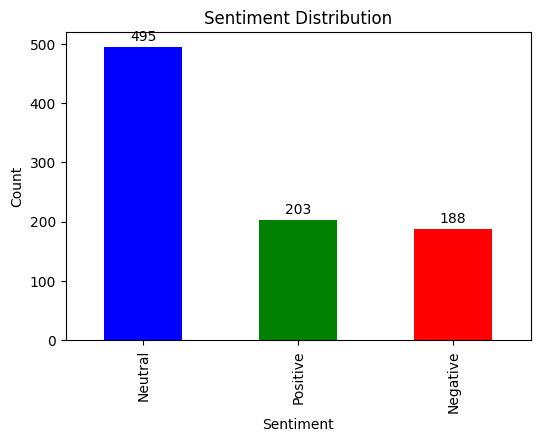

In [53]:
import matplotlib.pyplot as plt

colors = {'Positive': 'green', 'Negative': 'red', 'Neutral': 'blue'}
sentiment_counts = df['sentiment'].value_counts()
plt.figure(figsize=(6, 4))  
ax = sentiment_counts.plot(kind='bar', title='Sentiment Distribution', color=[colors[sent] for sent in sentiment_counts.index])
plt.xlabel('Sentiment')
plt.ylabel('Count')
for i, count in enumerate(sentiment_counts):
    ax.text(i, count + 5, str(count), ha='center', va='bottom')
plt.show()

In [54]:
from transformers import pipeline, set_seed
set_seed(42)
summarizer = pipeline("summarization")
def summarize_text(text):
    summary = summarizer(text, max_length=150, min_length=30, do_sample=False)[0]['summary_text']
    return summary
for i in range(3):
    headline_text = df['headline'][i]  
    print(f"Article {i + 1} Abstractive Summary:\n{summarize_text(headline_text)}\n")

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
Your max_length is set to 150, but your input_length is only 15. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)
Your max_length is set to 150, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)


Article 1 Abstractive Summary:
 Finding an Expansive View  of  of a Forgotten People in Niger . Nigerians are a forgotten people in the Niger region of the country .



Your max_length is set to 150, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)


Article 2 Abstractive Summary:
 And Now,  the Dreaded Trump Curse is on its way back to reality TV fame . Trump has been accused of being a serial serial serial rapist .

Article 3 Abstractive Summary:
 Venezuela’s Descent Into Dictatorship is Venezuela's descent into a dictatorship . Venezuela's President Hugo Chavez has been accused of being a dictator .



In [55]:
import tensorflow as tf
tf.compat.v1.reset_default_graph()
sess = tf.compat.v1.Session()

In [56]:
import gpt_2_simple as gpt2
gpt2.download_gpt2(model_name="124M")
sess = gpt2.start_tf_sess()
gpt2.load_gpt2(sess, model_name="124M")

Fetching checkpoint: 1.05Mit [00:00, 399Mit/s]                                                      
Fetching encoder.json: 1.05Mit [00:02, 443kit/s]                                                    
Fetching hparams.json: 1.05Mit [00:00, 1.04Git/s]                                                   
Fetching model.ckpt.data-00000-of-00001: 498Mit [06:27, 1.28Mit/s]                                  
Fetching model.ckpt.index: 1.05Mit [00:00, 973Mit/s]                                                
Fetching model.ckpt.meta: 1.05Mit [00:01, 672kit/s]                                                 
Fetching vocab.bpe: 1.05Mit [00:01, 670kit/s]                                                       


Loading pretrained model models\124M\model.ckpt
INFO:tensorflow:Restoring parameters from models\124M\model.ckpt


In [1]:
from pydub import AudioSegment
import librosa
import numpy as np
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import librosa.display
import IPython.display as ipd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
import soundfile as sf
from python_speech_features import mfcc
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tabulate import tabulate
import noisereduce as nr
import tabulate
from sklearn.preprocessing import LabelEncoder

C:\Python311\Lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [2]:
extraction_directory = "C:\\Users\\SHREEMATHI\\Downloads\\speech"
audio_files = []
for root, dirs, files in os.walk(extraction_directory):
    for file in files:
        if file.endswith(('.wav', '.mp3')):
            audio_files.append(os.path.join(root, file))

In [3]:
total_audio_files = len(audio_files)
print(f"Total count of audio files in the directory: {total_audio_files}")

Total count of audio files in the directory: 3697


In [4]:
for i, audio_file in enumerate(audio_files[:3]):
    y, sr = librosa.load(audio_file)
    print(f"Sample {i+1} - {audio_file}:")
    print(f"Duration: {librosa.get_duration(y=y, sr=sr)} seconds")
    print(f"Sample Rate: {sr} Hz")
    print()
    ipd.display(ipd.Audio(audio_file))

Sample 1 - C:\Users\SHREEMATHI\Downloads\speech\Actor_01\03-01-01-01-01-01-01.wav:
Duration: 3.3033106575963718 seconds
Sample Rate: 22050 Hz



Sample 2 - C:\Users\SHREEMATHI\Downloads\speech\Actor_01\03-01-01-01-01-02-01.wav:
Duration: 3.336689342403628 seconds
Sample Rate: 22050 Hz



Sample 3 - C:\Users\SHREEMATHI\Downloads\speech\Actor_01\03-01-01-01-02-01-01.wav:
Duration: 3.2699319727891156 seconds
Sample Rate: 22050 Hz



In [5]:
actors = os.listdir(extraction_directory)
file_extensions = set(file.split('.')[-1] for actor in actors for file in os.listdir(os.path.join(extraction_directory, actor)))
print(file_extensions)

{'Actor_24', 'Actor_06', 'Actor_16', 'Actor_12', 'Actor_21', 'Actor_07', 'Actor_17', 'Actor_13', 'Actor_15', 'Actor_01', 'Actor_22', 'Actor_23', 'Actor_04', 'Actor_05', 'Actor_09', 'Actor_10', 'Actor_14', 'wav', 'Actor_08', 'Actor_11', 'Actor_03', 'Actor_19', 'Actor_20', 'Actor_02', 'Actor_18'}


In [6]:
audio_durations = []
for audio_file in audio_files:
    audio = AudioSegment.from_file(audio_file)
    duration_seconds = len(audio) / 1000  
    audio_durations.append(duration_seconds)

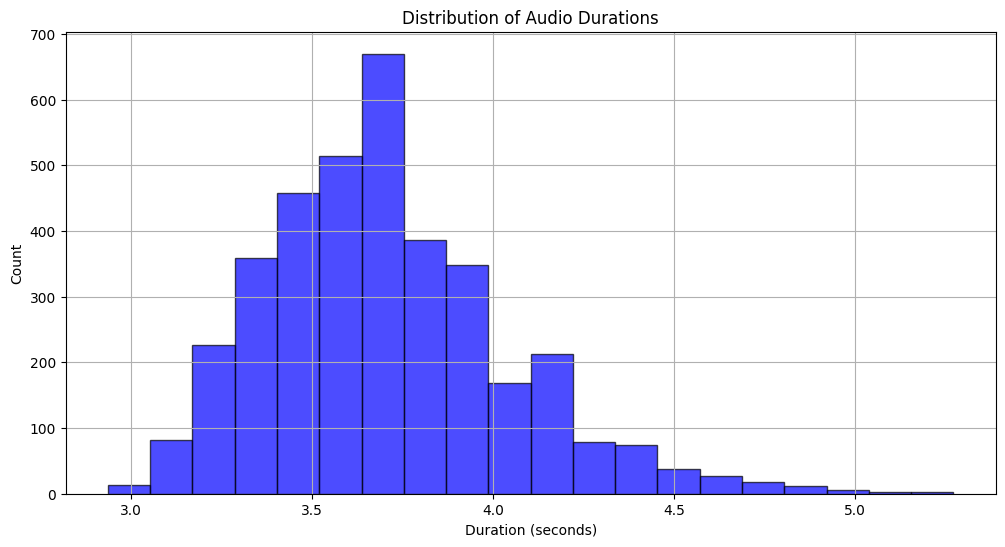

In [7]:
plt.figure(figsize=(12, 6))
plt.hist(audio_durations, bins=20, color='blue', alpha=0.7, edgecolor='black')
plt.xlabel('Duration (seconds)')
plt.ylabel('Count')
plt.title('Distribution of Audio Durations')
plt.grid(True)
plt.show()

In [8]:
emotions = [int(os.path.basename(file).split('-')[2]) for file in audio_files]
emotion_labels = ['Neutral', 'Calm', 'Happy', 'Sad', 'Angry', 'Fearful', 'Disgust', 'Surprised']
emotion_counts = [emotions.count(i) for i in range(8)]

In [9]:
import os
import pandas as pd
data_directory = "C:\\Users\\SHREEMATHI\\Downloads\\speech"
file_emotion = []
file_path = []
for root, dirs, files in os.walk(data_directory):
    for file in files:
        part = file.split('.')[0]
        part = part.split('-')
        file_emotion.append(int(part[2]))
        file_path.append(os.path.join(root, file))
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])
dataset_df = pd.concat([emotion_df, path_df], axis=1)
dataset_df.Emotions.replace({1: 'neutral', 2: 'calm', 3: 'happy', 4: 'sad', 5: 'angry', 6: 'fear', 7: 'disgust', 8: 'surprise'}, inplace=True)
print(dataset_df.head(5))

  Emotions                                               Path
0  neutral  C:\Users\SHREEMATHI\Downloads\speech\Actor_01\...
1  neutral  C:\Users\SHREEMATHI\Downloads\speech\Actor_01\...
2  neutral  C:\Users\SHREEMATHI\Downloads\speech\Actor_01\...
3  neutral  C:\Users\SHREEMATHI\Downloads\speech\Actor_01\...
4     calm  C:\Users\SHREEMATHI\Downloads\speech\Actor_01\...


In [10]:
emotion_counts = dataset_df['Emotions'].value_counts()
print(emotion_counts)

Emotions
calm        560
happy       560
sad         560
angry       556
fear        552
disgust     552
surprise    552
neutral     280
Name: count, dtype: int64


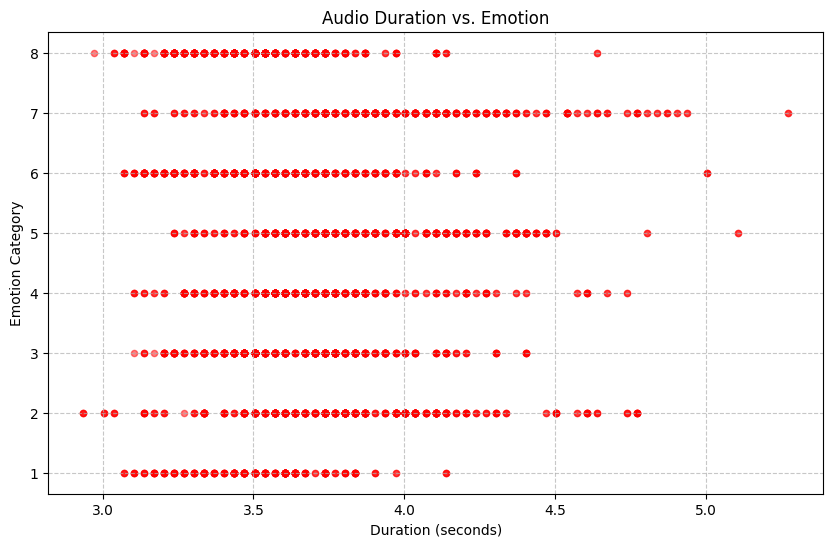

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(audio_durations, emotions, c='red', alpha=0.5, s=20, marker='o')
plt.xlabel('Duration (seconds)')
plt.ylabel('Emotion Category')
plt.title('Audio Duration vs. Emotion')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Sample 1 - C:\Users\SHREEMATHI\Downloads\speech\Actor_01\03-01-01-01-01-01-01.wav:
Duration: 3.3033106575963718 seconds
Sample Rate: 22050 Hz


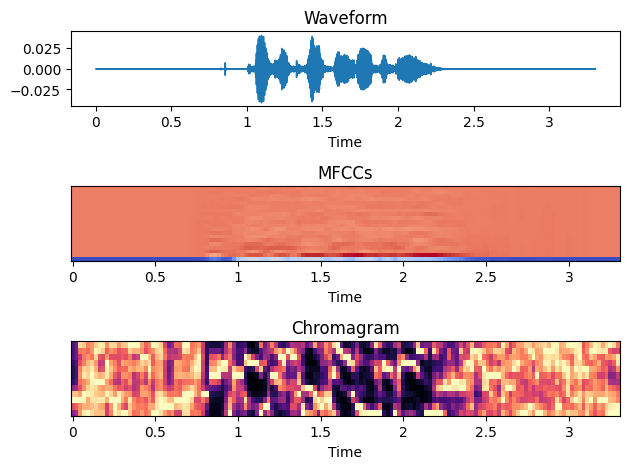

Sample 2 - C:\Users\SHREEMATHI\Downloads\speech\Actor_01\03-01-01-01-01-02-01.wav:
Duration: 3.336689342403628 seconds
Sample Rate: 22050 Hz


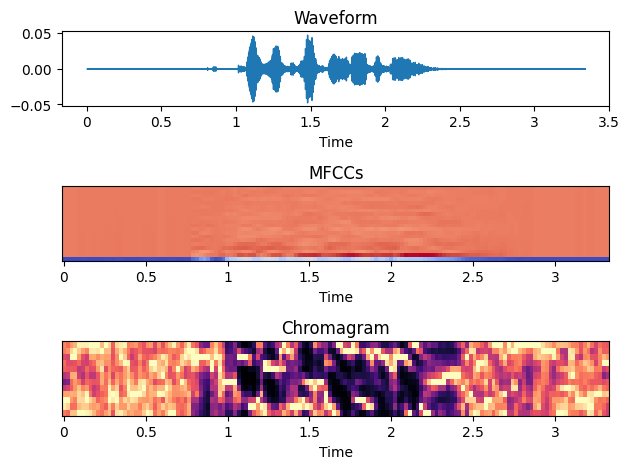

In [12]:
for i, audio_file in enumerate(audio_files[:2]):
    y, sr = librosa.load(audio_file)
    duration = librosa.get_duration(y=y, sr=sr)
    print(f"Sample {i+1} - {audio_file}:")
    print(f"Duration: {duration} seconds")
    print(f"Sample Rate: {sr} Hz")
    plt.figure()
    plt.subplot(3, 1, 1)
    librosa.display.waveshow(y, sr=sr)
    plt.title("Waveform")
    mfccs = librosa.feature.mfcc(y=y, sr=sr)
    plt.subplot(3, 1, 2)
    librosa.display.specshow(mfccs, x_axis='time')
    plt.title("MFCCs")
    chromagram = librosa.feature.chroma_stft(y=y, sr=sr)
    plt.subplot(3, 1, 3)
    librosa.display.specshow(chromagram, x_axis='time')
    plt.title("Chromagram")
    plt.tight_layout()
    plt.show()

In [13]:
data_directory = 'C:\\Users\\SHREEMATHI\\Downloads\\speech'
audio_data = []
file_names = []
for root, dirs, files in os.walk(data_directory):
    for file in files:
        if file.endswith(('.wav', '.mp3')):
            audio_path = os.path.join(root, file)
            audio, sr = librosa.load(audio_path, sr=None)  
            audio_data.append(audio)
            file_names.append(audio_path)
audio_durations = [len(audio) / float(sr) for audio, sr in zip(audio_data, [sr] * len(audio_data))]
for duration, file_name in zip(audio_durations, file_names):
    print(f"Audio Duration: {duration:.2f} seconds, File Name: {file_name}")

Audio Duration: 3.30 seconds, File Name: C:\Users\SHREEMATHI\Downloads\speech\Actor_01\03-01-01-01-01-01-01.wav
Audio Duration: 3.34 seconds, File Name: C:\Users\SHREEMATHI\Downloads\speech\Actor_01\03-01-01-01-01-02-01.wav
Audio Duration: 3.27 seconds, File Name: C:\Users\SHREEMATHI\Downloads\speech\Actor_01\03-01-01-01-02-01-01.wav
Audio Duration: 3.17 seconds, File Name: C:\Users\SHREEMATHI\Downloads\speech\Actor_01\03-01-01-01-02-02-01.wav
Audio Duration: 3.54 seconds, File Name: C:\Users\SHREEMATHI\Downloads\speech\Actor_01\03-01-02-01-01-01-01.wav
Audio Duration: 3.60 seconds, File Name: C:\Users\SHREEMATHI\Downloads\speech\Actor_01\03-01-02-01-01-02-01.wav
Audio Duration: 3.50 seconds, File Name: C:\Users\SHREEMATHI\Downloads\speech\Actor_01\03-01-02-01-02-01-01.wav
Audio Duration: 3.47 seconds, File Name: C:\Users\SHREEMATHI\Downloads\speech\Actor_01\03-01-02-01-02-02-01.wav
Audio Duration: 3.70 seconds, File Name: C:\Users\SHREEMATHI\Downloads\speech\Actor_01\03-01-02-02-01-01

In [14]:
output_directory = 'C:\\Users\\SHREEMATHI\\Downloads\\speech\\noise_reduced'
os.makedirs(output_directory, exist_ok=True)

In [15]:
for root, dirs, files in os.walk(data_directory):
    for file in files:
        if file.endswith(('.wav', '.mp3')):
            audio_path = os.path.join(root, file)
            audio, sr = librosa.load(audio_path, sr=None)  
            audio_denoised = nr.reduce_noise(y=audio, sr=sr)
            output_path = os.path.join(output_directory, file)
            sf.write(output_path, audio_denoised, sr)
            print(f"Noise reduction applied to: {file}")

Noise reduction applied to: 03-01-01-01-01-01-01.wav
Noise reduction applied to: 03-01-01-01-01-02-01.wav
Noise reduction applied to: 03-01-01-01-02-01-01.wav
Noise reduction applied to: 03-01-01-01-02-02-01.wav
Noise reduction applied to: 03-01-02-01-01-01-01.wav
Noise reduction applied to: 03-01-02-01-01-02-01.wav
Noise reduction applied to: 03-01-02-01-02-01-01.wav
Noise reduction applied to: 03-01-02-01-02-02-01.wav
Noise reduction applied to: 03-01-02-02-01-01-01.wav
Noise reduction applied to: 03-01-02-02-01-02-01.wav
Noise reduction applied to: 03-01-02-02-02-01-01.wav
Noise reduction applied to: 03-01-02-02-02-02-01.wav
Noise reduction applied to: 03-01-03-01-01-01-01.wav
Noise reduction applied to: 03-01-03-01-01-02-01.wav
Noise reduction applied to: 03-01-03-01-02-01-01.wav
Noise reduction applied to: 03-01-03-01-02-02-01.wav
Noise reduction applied to: 03-01-03-02-01-01-01.wav
Noise reduction applied to: 03-01-03-02-01-02-01.wav
Noise reduction applied to: 03-01-03-02-02-01-

In [62]:
label_encoder = LabelEncoder()
label_encoder.fit(dataset_df['Emotions'])
dataset_df['Encoded_Emotions'] = label_encoder.transform(dataset_df['Emotions'])
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

In [63]:
print(label_mapping)

{'angry': 0, 'calm': 1, 'disgust': 2, 'fear': 3, 'happy': 4, 'neutral': 5, 'sad': 6, 'surprise': 7}


In [64]:
print(dataset_df.head(5))

  Emotions                                               Path   
0  neutral  C:\Users\SHREEMATHI\Downloads\speech\Actor_01\...  \
1  neutral  C:\Users\SHREEMATHI\Downloads\speech\Actor_01\...   
2  neutral  C:\Users\SHREEMATHI\Downloads\speech\Actor_01\...   
3  neutral  C:\Users\SHREEMATHI\Downloads\speech\Actor_01\...   
4     calm  C:\Users\SHREEMATHI\Downloads\speech\Actor_01\...   

   Encoded_Emotions  
0                 5  
1                 5  
2                 5  
3                 5  
4                 1  


In [65]:
audio_files = [os.path.join(output_directory, file) for file in os.listdir(output_directory) if file.endswith(('.wav', '.mp3'))]
X_train, X_test = train_test_split(audio_files, test_size=0.2, random_state=42)

In [66]:
print(f"Number of training samples: {len(X_train)}")
print(f"Number of testing samples: {len(X_test)}")

Number of training samples: 1152
Number of testing samples: 288


In [67]:
X_train, X_test, y_train, y_test = train_test_split(dataset_df['Path'], dataset_df['Encoded_Emotions'], test_size=0.2, random_state=42)

In [68]:
def extract_features(audio_file):
    audio, sr = librosa.load(audio_file, sr=None)
    mean = np.mean(audio)
    variance = np.var(audio)
    return [mean, variance] 

In [69]:
X_train_features = [extract_features(audio_file) for audio_file in X_train]
X_test_features = [extract_features(audio_file) for audio_file in X_test]

In [70]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_features, y_train)
y_pred = rf_model.predict(X_test_features)

In [71]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 63.35%
Precision: 0.63
Recall: 0.63
F1 Score: 0.63


In [72]:
test_audio_path = "C:\\Users\\SHREEMATHI\\Downloads\\speech\\Actor_24\\03-01-08-01-02-01-24.wav"
audio_features = extract_features(test_audio_path)  
predicted_emotion = rf_model.predict([audio_features])
decoded_emotion = label_encoder.inverse_transform(predicted_emotion)[0]
print(f"Predicted Emotion: {decoded_emotion}")

Predicted Emotion: surprise


In [7]:
import speech_recognition as sr
def transcribe_audio(audio_file_path):
    recognizer = sr.Recognizer()
    with sr.AudioFile(audio_file_path) as source:
        audio = recognizer.record(source)
    try:
        text = recognizer.recognize_google(audio)
        print("Transcription: " + text)
    except sr.UnknownValueError:
        print("Google Web Speech API could not understand the audio")
    except sr.RequestError as e:
        print(f"Could not request results from Google Web Speech API; {e}")
if __name__ == "__main__":
    audio_file_path ="C:\\Users\\SHREEMATHI\\Downloads\\sample audio.wav"
    transcribe_audio(audio_file_path)

Transcription: India is a diverse country


In [31]:
prompt = input("Enter the prompt for content generation: ")
generated_content = gpt2.generate(sess, model_name="124M", prefix=prompt, length=100, return_as_list=True)[0]
print("\nGenerated Content:")
print(generated_content)

Enter the prompt for content generation: india is a diverse country

Generated Content:
india is a diverse country, and it's surprisingly difficult to find anyone who doesn't know what it's like to be a female. It's also difficult to find anyone who agrees with you that gender equality is a poor idea, particularly when it comes to the very issues that you have with the government.

"I think that our society is already very much in the minority of the countries in the world where gender equality is being talked about. But that's not a problem. There are plenty of countries that we can
